<a href="https://colab.research.google.com/github/LXenon/LXenon/blob/main/PYDA_DIPLOM_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [481]:
import pandas as pd
import numpy as np

In [482]:
# 1. Загрузим файл HR.csv в pandas DataFrame
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [483]:
# Посмотрим основную информацию, проверим, есть ли в данных пропуски
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [484]:
# Пропуски в данных отсутствуют
# По первым 5 строкам DataFrame и из названия столбцов можно предположить, что данные в первых 5 столбцах количественные, в 5 последних - качественные, проанализируем

In [485]:
print(hr['satisfaction_level'].unique())

[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]


In [486]:
print(hr['last_evaluation'].unique())

[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]


In [487]:
print(hr['number_project'].unique())

[2 5 7 6 4 3]


In [488]:
print(hr['average_montly_hours'].unique())

[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 286 161 264 277 275 149 295
 151 249 291 232 130 129 155 265 279 284 221 154 150 267 257 177 144 289
 258 263 251 133 216 300 138 260 183 250 292 283 245 256 278 240 136 301
 243 296 274 164 146 261 285 141 297 156 287 219 254 228 131 252 236 270
 298 192 248 266 238 229 233 268 231 253 302 271 290 235 293 241 218 199
 180 195 237 227 172 206 181 217 310 214 198 211 222 213 202 184 204 288
 220 299 303 212 196 179 205 230 203 280 169 188 178 175 166 163 168 165
 189 162 215 193 176 191 174 201 208 171 111 104 106 100 194 209 185 200
 207 187 210 186 167 108 122 110 115 197 102 109 190  99 101  97 173 121
 170 105 118 119 117 114  96  98 107 123 116 125 113 120 112 124 103]


In [489]:
print(hr['time_spend_company'].unique())

[ 3  6  4  5  2  8 10  7]


In [490]:
# Данные в столбцах 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company' количественные

In [491]:
print('Work_accident:', hr['Work_accident'].unique())
print('left:', hr['left'].unique())
print('promotion_last_5years: ', hr['promotion_last_5years'].unique())

Work_accident: [0 1]
left: [1 0]
promotion_last_5years:  [0 1]


In [492]:
# Данные в столбцах "Work_accident",	"left",	"promotion_last_5years" яляются качественными (номинальными)

In [493]:
print('departments: ', hr['department'].unique())

departments:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [494]:
# Данные в столбце "department" также яляются качественными (номинальными)

In [495]:
print('salaries: ', hr['salary'].unique())

salaries:  ['low' 'medium' 'high']


In [496]:
# Данные в столбе "salary" - качественные (порядковые)

In [497]:
# 2. Рассчитаем основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

# Используя метод .describe() рассчитаем среднее (mean), медиану (50%), мин (min)/макс (max), сред.отклонение (std):
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [498]:
# Моду рассчитаем, используя метод .mode():
print('Значение моды для столбца satisfaction_level: ', hr['satisfaction_level'].round().mode()[0])
print('Значение моды для столбца last_evaluation: ', hr['last_evaluation'].round().mode()[0])
print('Значение моды для столбца number_project: ', hr['number_project'].round().mode()[0])
print('Значение моды для столбца average_montly_hours: ', hr['average_montly_hours'].round().mode()[0])
print('Значение моды для столбца time_spend_company: ', hr['time_spend_company'].round().mode()[0])
print('Значение моды для столбца Work_accident: ', hr['Work_accident'].round().mode()[0])
print('Значение моды для столбца left: ', hr['left'].round().mode()[0])
print('Значение моды для столбца promotion_last_5years: ', hr['promotion_last_5years'].mode()[0])
print('Значение моды для столбца department: ', hr['department'].mode()[0])
print('Значение моды для столбца salary: ', hr['salary'].mode()[0])

Значение моды для столбца satisfaction_level:  1.0
Значение моды для столбца last_evaluation:  1.0
Значение моды для столбца number_project:  4
Значение моды для столбца average_montly_hours:  135
Значение моды для столбца time_spend_company:  3
Значение моды для столбца Work_accident:  0
Значение моды для столбца left:  0
Значение моды для столбца promotion_last_5years:  0
Значение моды для столбца department:  sales
Значение моды для столбца salary:  low


In [499]:
# 3. Рассчитаем корреляционную матрицу для количественных переменных.
hr_corr_matrix = hr[ ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'] ].corr()
hr_corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


Text(0.5, 1.0, 'Тепловая карта')

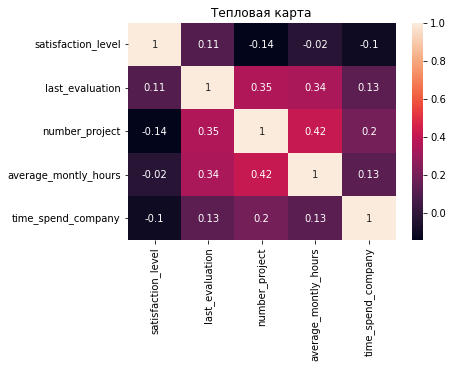

In [500]:
# Визуализируем
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(hr_corr_matrix, annot=True)
plt.title('Тепловая карта')

In [501]:
# На основании полученной тепловой карты определим две самые скоррелированные переменные и две наименее скоррелированные переменные.

In [502]:
# Две самые скоррелированные переменные:
# average_montly_hours (Среднее количество часов на рабочем месте в месяц), number_project (Количество проектов, выполненных за время работы)
# Коэффициент корреляции для этой пары равен 0.417211
hr[ ['average_montly_hours', 'number_project'] ].corr()

,average_montly_hours,number_project
average_montly_hours,1.000000,0.417211
number_project,0.417211,1.000000


In [503]:
# Две наименее скоррелированные переменные:
# number_project (Количество проектов, выполненных за время работы) & satisfaction_level (Уровень удовлетворенности работой)
# Коэффициент корреляции для этой пары равен -0.142970
hr[ ['number_project', 'satisfaction_level'] ].corr()

,number_project,satisfaction_level
number_project,1.00000,-0.14297
satisfaction_level,-0.14297,1.00000


In [504]:
# 4. Рассчитаем сколько сотрудников работает в каждом департаменте.
# Для расчета используем информацию о том, уволился ли сотрудник (left = 0 - не уволился, left = 1 - уволился)
departments = hr[ ['department','left'] ]
staff_stay = departments[ departments['left'] == 0 ]
staff_saty_per_department = staff_stay.groupby(by=['department']).count()
staff_saty_per_department = staff_saty_per_department.rename(columns= {'left': 'staff_stay'})
staff_saty_per_department

,staff_stay
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


In [505]:
# Проверим корректность вычислений 

In [506]:
staff_saty_per_department.sum()

staff_stay    11428
dtype: int64

In [507]:
left = departments[ departments['left'] == 1 ]
left['left'].sum()

3571

In [508]:
staff_saty_per_department.sum() + left['left'].sum()

staff_stay    14999
dtype: int64

In [509]:
# 5. Покажем распределение сотрудников по зарплатам.

In [510]:
# Преобразуем данные об уровне зарплаты в числовые: 'low' = 1, 'medium' = 2, 'high' = 3
"""
def salary_level(row) - получает на вход данные столбца 'salary' и преобразует в соответствии с заданной классификацией: 'low' = 1, 'medium' = 2, 'high' = 3
"""

def salary_level(row):
  if row == 'low':
    return 1
  elif row == 'medium':
    return 2
  elif row == 'high':
    return 3

salary_level = hr['salary'].apply(salary_level)
salary_level.describe()

count    14999.000000
mean         1.594706
std          0.637183
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: salary, dtype: float64

In [511]:
salary_level.mode()

0    1
dtype: int64

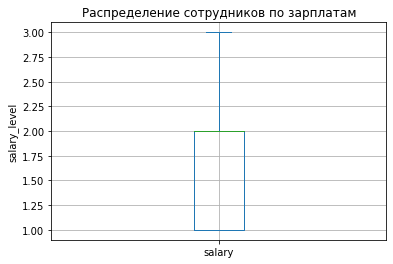

In [512]:
# Визуализируем
import matplotlib.pyplot as plt

salary_level.plot(kind='box', 
                  title='Распределение сотрудников по зарплатам',
                  ylabel='salary_level',
                  grid=True)
plt.show()

In [513]:
# Диаграмма размаха показывает, как распределены сотрудники по зарплатам, какой уровень зарплат является наиболее распростаненным (1 - low, 2 - medium).

In [514]:
# 6. Покажем распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [515]:
# Создадим копию набора данных
hr_new = hr.copy(deep=True)

# Преобразуем столбец 'salary'
"""
def salary_level(row) - получает на вход данные столбца 'salary' и преобразует в соответствии с заданной классификацией: 'low' = 1, 'medium' = 2, 'high' = 3
"""

def salary_level(row):
  if row == 'low':
    return 1
  elif row == 'medium':
    return 2
  elif row == 'high':
    return 3

hr_new['salary_level'] = hr_new['salary'].apply(salary_level)
hr_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [516]:
# Сгруппируем данные по департаментам и уровням зарплаты
departments_salary = hr_new[ ['department', 'salary_level'] ]
departments_salary_grouped = departments_salary.groupby(['department'])['salary_level'].value_counts()
departments_salary_grouped

department   salary_level
IT           1                609
             2                535
             3                 83
RandD        2                372
             1                364
             3                 51
accounting   1                358
             2                335
             3                 74
hr           2                359
             1                335
             3                 45
management   2                225
             3                225
             1                180
marketing    1                402
             2                376
             3                 80
product_mng  1                451
             2                383
             3                 68
sales        1               2099
             2               1772
             3                269
support      1               1146
             2                942
             3                141
technical    1               1372
             2        

In [517]:
departments_salary_grouped.sum()

14999

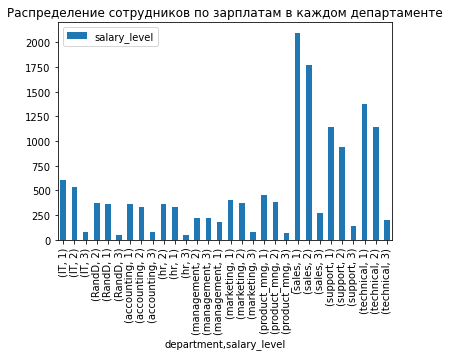

In [518]:
# Визуализируем
departments_salary_grouped.plot(kind='bar',
                                title= 'Распределение сотрудников по зарплатам в каждом департаменте',
                                legend=True,
                                stacked=True)
plt.show()

In [519]:
# Диаграмма позволяет сравнить департаменты по количеству сорудников, входящих в их состав, в разбивке по уровням зарплаты.
# На диаграмме видно, что больше всего сотрудников в департаменте sales, причем у большинства уровень оплаты труда 1-low. 

In [520]:
# 7. Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [521]:
# Сформируем на основе имеющегося набора данных данные для рассчетов

In [522]:
high_salary = hr[ hr['salary'] == 'high']
high_salary_hours = high_salary['average_montly_hours']
high_salary_hours.describe()

count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64

In [523]:
low_salary = hr[ hr['salary'] == 'low']
low_salary_hours = low_salary['average_montly_hours']
low_salary_hours.describe()

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64

In [524]:
# Определим, является ли распределение нормальным, выдвинем гипотезы:
# H0 - данные распределены нормально,
# H1 - данные не имеют нормального распределения.

# Для проверки гипотез используем критерий Пирсона, возвращающий значение вычисленной статистики и p-значение. 
# В качестве критического значения возьмем 0.05. При p-значении меньше 0.05 отклоняем нулевую гипотезу.

In [525]:
import scipy.stats as stats

In [526]:
stat, pvalue = stats.normaltest(high_salary_hours)
stat, pvalue

(339.6780763630229, 1.7371723411635018e-74)

In [527]:
alfa = 0.05

if pvalue < alfa:
  print('Отвергаем нулевую гипотезу, распределение выборочных данных не подчинено нормальному закону распределения')
else:
  print('Нельзя отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу, распределение выборочных данных не подчинено нормальному закону распределения


In [528]:
stat, pvalue = stats.normaltest(low_salary_hours)
stat, pvalue

(4477.067418431068, 0.0)

In [529]:
alfa = 0.05

if pvalue < alfa:
  print('Отвергаем нулевую гипотезу, распределение выборочных данных не подчинено нормальному закону распределения')
else:
  print('Нельзя отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу, распределение выборочных данных не подчинено нормальному закону распределения


In [530]:
# Визуализируем данные

In [531]:
import matplotlib.pyplot as plt

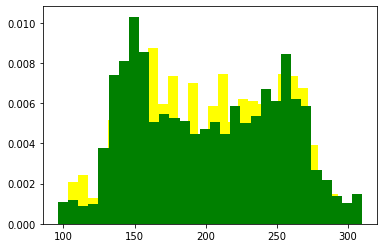

In [532]:
plt.hist(high_salary_hours, bins=30, color='yellow', density=True)
plt.hist(low_salary_hours, bins=30, color='green', density=True)
plt.show()

In [533]:
# На гистограмме также видно, что данные не подчинены нормальному распределению, наблюдается наличие как минимум 2-х пиков

In [534]:
# Распределение выборочных данных не подчинено нормальному закону распределения, поэтому для сравнения выборок будем использовать критерий Манна-Уитни и вычислять медианы

# Выдвинем гипотезы:
# H0 - отсутствует статистически значимое различие между количеством времени, проводимым на работе сотрудниками с высоким окладом, 
#       и количеством времени, проводимым на работе сотруднками с низким окладом
# H1 - различия между количеством времени, проводимым на рабое сотрудниками с разными окладами, статистически значимы

# В качестве критического значения возьмем 0.05. При p-значении меньше 0.05 отклоняем нулевую гипотезу.

In [535]:
stat, p_value = stats.mannwhitneyu(high_salary_hours, low_salary_hours)
print('stat: ', stat)
print('p_value: ', p_value)

stat:  4507096.5
p_value:  0.4120665360429347


In [536]:
alfa = 0.05

if p_value < alfa:
  print('Отвергаем нулевую гипотезу')
else:
  print('Нельзя отвергнуть нулевую гипотезу')

Нельзя отвергнуть нулевую гипотезу


In [537]:
# Прверим, рассчитав медианные значения
if high_salary_hours.median() == low_salary_hours.median():
  print('Отсутствует статистически значимое различие между количеством времени, проводимым на работе и уровнем оплаты труда')
elif high_salary_hours.median() > low_salary_hours.median():
  print('Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
else:
  print('Сотрудники с высоким окладом проводят на работе НЕ больше времени, чем сотрудники с низким окладом')

Отсутствует статистически значимое различие между количеством времени, проводимым на работе и уровнем оплаты труда


In [539]:
# Вывод: нельзя сделать вывод о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [540]:
# 8. Рассчитаем следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    # Доля сотрудников с повышением за последние 5 лет
    # Средняя степень удовлетворенности
    # Среднее количество проектов

In [541]:
# Сформируем на основе имеющегося набора данных данные для рассчетов
hr_research = hr[ ['promotion_last_5years', 'satisfaction_level', 'number_project', 'left'] ]

In [542]:
# Разделим данные на два блока: для уволившихся сотрудников и для неуволившихся сотрудников, рассчитаем показатели для каждого из блоков

In [543]:
# Для уволившихся сотрудников
staff_left = hr_research[ hr_research['left'] == 1 ]

print('Доля сотрудников с повышением за последние 5 лет среди уволившихся: ', staff_left['promotion_last_5years'].value_counts(normalize=True)[1])
print('Средняя степень удовлетворенности уволившихся сотрудников:', staff_left['satisfaction_level'].mean())
print('Среднее количество проектов уволившихся сотрудников: ', staff_left['number_project'].mean())

Доля сотрудников с повышением за последние 5 лет среди уволившихся:  0.005320638476617194
Средняя степень удовлетворенности уволившихся сотрудников: 0.44009801176140917
Среднее количество проектов уволившихся сотрудников:  3.8555026603192384


In [544]:
# Для неуволившихся сотрудников
staff_stay = hr_research[ hr_research['left'] == 0 ]
print('Доля сотрудников с повышением за последние 5 лет среди неуволившихся: ', staff_stay['promotion_last_5years'].value_counts(normalize=True)[1])
print('Средняя степень удовлетворенности неуволившихся сотрудников:', staff_stay['satisfaction_level'].mean())
print('Среднее количество проектов неуволившихся сотрудников: ', staff_stay['number_project'].mean())

Доля сотрудников с повышением за последние 5 лет среди неуволившихся:  0.026251312565628283
Средняя степень удовлетворенности неуволившихся сотрудников: 0.666809590479516
Среднее количество проектов неуволившихся сотрудников:  3.786664333216661


In [545]:
# 9. Разделим данные на тестовую и обучающую выборки, построим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary),
# оценим качество модели на тестовой выборки

In [546]:
# Выберем данные для анализа
hr_independent_variable = hr.drop(columns=(['left', 'department', 'salary']))
hr_independent_variable.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [547]:
hr_dependent_variable = hr['left'].values
hr_dependent_variable

array([1, 1, 1, ..., 1, 1, 1])

In [548]:
# Разделим данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr_independent_variable, hr_dependent_variable, test_size=0.30, random_state=42)

In [549]:
# Построим модель LDA, для этого импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [550]:
# Обучим данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [551]:
# Сделаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [552]:
# Определим коэффициенты дискриминатных линий
lda.coef_

array([[-4.57738626e+00,  6.13822647e-01, -2.10613368e-01,
         4.55442333e-03,  2.21314862e-01, -1.05033789e+00,
        -1.08559074e+00]])

In [553]:
# Посмотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
4495,0,0
4496,0,1
4497,0,0
4498,0,0


In [555]:
# Сделаем расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778